In [ ]:
from utils import train_load_datasets_resnet as tr
from torch.utils.data import DataLoader, ConcatDataset
from torch.utils.data import random_split
from torchvision import transforms
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
flag = 'organamnist'
color = False  # Colors for the flags
use_randaugment = True         # <- enable/disable RandAugment here
randaugment_ops = 2            # number of ops per image
randaugment_mag = 9            # magnitude (0-10 typical)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
size = 224  # Image size for the models
batch_size = 128

if color is True:
    train_tfms = []
    if use_randaugment:
        train_tfms.append(transforms.RandAugment(num_ops=randaugment_ops, magnitude=randaugment_mag))
    train_tfms += [
        transforms.ToTensor(),
        transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5])
    ]
    transform_train = transforms.Compose(train_tfms)

    transform_eval = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5])
    ])
    
else:
    train_tfms = []
    if use_randaugment:
        train_tfms.append(transforms.RandAugment(num_ops=randaugment_ops, magnitude=randaugment_mag))
    train_tfms += [
        transforms.ToTensor(),
        transforms.Normalize(mean=[.5], std=[.5]),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1))
    ]
    transform_train = transforms.Compose(train_tfms)

    transform_eval = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[.5], std=[.5]),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1))
    ])

# Load plain datasets/loaders (no augmentation)
[train_dataset_plain, calibration_dataset, test_dataset], [_, calibration_loader, test_loader], info = tr.load_datasets(flag, color, size, transform_eval, batch_size)

if use_randaugment:
    print(f'Using RandAugment with {randaugment_ops} ops and magnitude {randaugment_mag}')
    # Build an augmented view aligned to the same 80% train indices
    # 1) Recreate train+val with augmented transform
    aug_triplet, _ = tr.get_datasets(flag, im_size=size, color=color, transform=transform_train)
    combined_aug = ConcatDataset([aug_triplet[0], aug_triplet[1]])

    # 2) Wrap with the exact same indices as the 80% train subset
    train_dataset_aug = torch.utils.data.Subset(combined_aug, train_dataset_plain.indices)

    train_loaders, val_loaders = tr.CV_train_val_loaders(train_dataset_aug, train_dataset_plain, batch_size=batch_size)
else:
    print('Not using RandAugment')
    train_loaders, val_loaders = tr.CV_train_val_loaders(None, train_dataset_plain, batch_size=batch_size)

Training dataset size: 32841
Calibration dataset size: 8211
Using RandAugment with 2 ops and magnitude 9


MODEL 0
Training dataset size: 32841
Calibration dataset size: 8211
Train Epoch: 0 [0/26272 (0%)]	Loss: 2.520064
Train Epoch: 0 [1280/26272 (5%)]	Loss: 0.800059
Train Epoch: 0 [2560/26272 (10%)]	Loss: 0.500547
Train Epoch: 0 [3840/26272 (15%)]	Loss: 0.327170
Train Epoch: 0 [5120/26272 (20%)]	Loss: 0.347782
Train Epoch: 0 [6400/26272 (24%)]	Loss: 0.174861
Train Epoch: 0 [7680/26272 (29%)]	Loss: 0.191503
Train Epoch: 0 [8960/26272 (34%)]	Loss: 0.303121
Train Epoch: 0 [10240/26272 (39%)]	Loss: 0.126012
Train Epoch: 0 [11520/26272 (44%)]	Loss: 0.169897
Train Epoch: 0 [12800/26272 (49%)]	Loss: 0.129706
Train Epoch: 0 [14080/26272 (54%)]	Loss: 0.148104
Train Epoch: 0 [15360/26272 (59%)]	Loss: 0.110829
Train Epoch: 0 [16640/26272 (63%)]	Loss: 0.119997
Train Epoch: 0 [17920/26272 (68%)]	Loss: 0.088187
Train Epoch: 0 [19200/26272 (73%)]	Loss: 0.090973
Train Epoch: 0 [20480/26272 (78%)]	Loss: 0.118155
Train Epoch: 0 [21760/26272 (83%)]	Loss: 0.123300
Train Epoch: 0 [23040/26272 (88%)]	Loss: 0.09

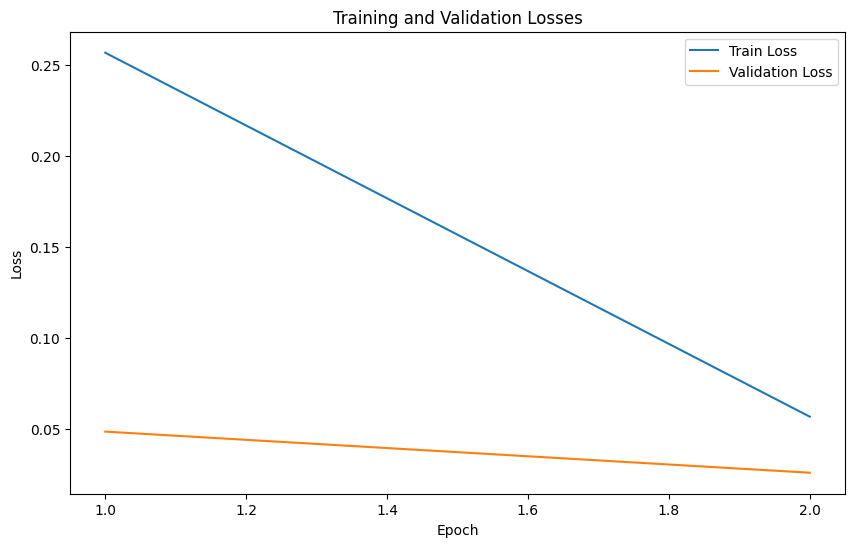

Accuracy: 0.960
Balanced Accuracy: 0.956
AUC: 0.998


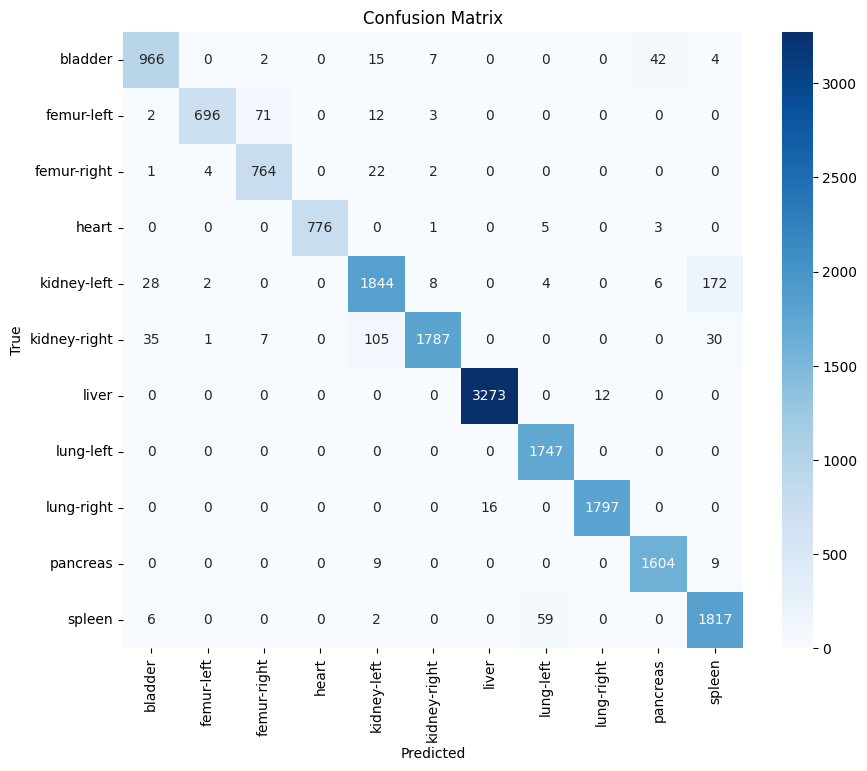

MODEL 1
Training dataset size: 32841
Calibration dataset size: 8211
Train Epoch: 0 [0/26273 (0%)]	Loss: 2.547822
Train Epoch: 0 [1280/26273 (5%)]	Loss: 0.886982
Train Epoch: 0 [2560/26273 (10%)]	Loss: 0.489392
Train Epoch: 0 [3840/26273 (15%)]	Loss: 0.293599
Train Epoch: 0 [5120/26273 (20%)]	Loss: 0.336930
Train Epoch: 0 [6400/26273 (24%)]	Loss: 0.214524
Train Epoch: 0 [7680/26273 (29%)]	Loss: 0.269557
Train Epoch: 0 [8960/26273 (34%)]	Loss: 0.206905
Train Epoch: 0 [10240/26273 (39%)]	Loss: 0.183340
Train Epoch: 0 [11520/26273 (44%)]	Loss: 0.128844
Train Epoch: 0 [12800/26273 (49%)]	Loss: 0.091904
Train Epoch: 0 [14080/26273 (54%)]	Loss: 0.084306
Train Epoch: 0 [15360/26273 (59%)]	Loss: 0.138986
Train Epoch: 0 [16640/26273 (63%)]	Loss: 0.134158
Train Epoch: 0 [17920/26273 (68%)]	Loss: 0.140001
Train Epoch: 0 [19200/26273 (73%)]	Loss: 0.152870
Train Epoch: 0 [20480/26273 (78%)]	Loss: 0.124563
Train Epoch: 0 [21760/26273 (83%)]	Loss: 0.092744
Train Epoch: 0 [23040/26273 (88%)]	Loss: 0.04

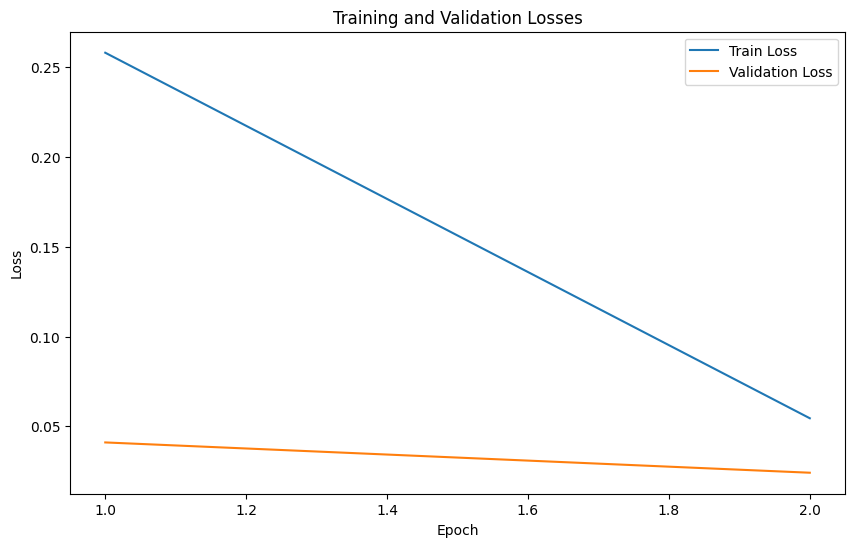

Accuracy: 0.955
Balanced Accuracy: 0.952
AUC: 0.998


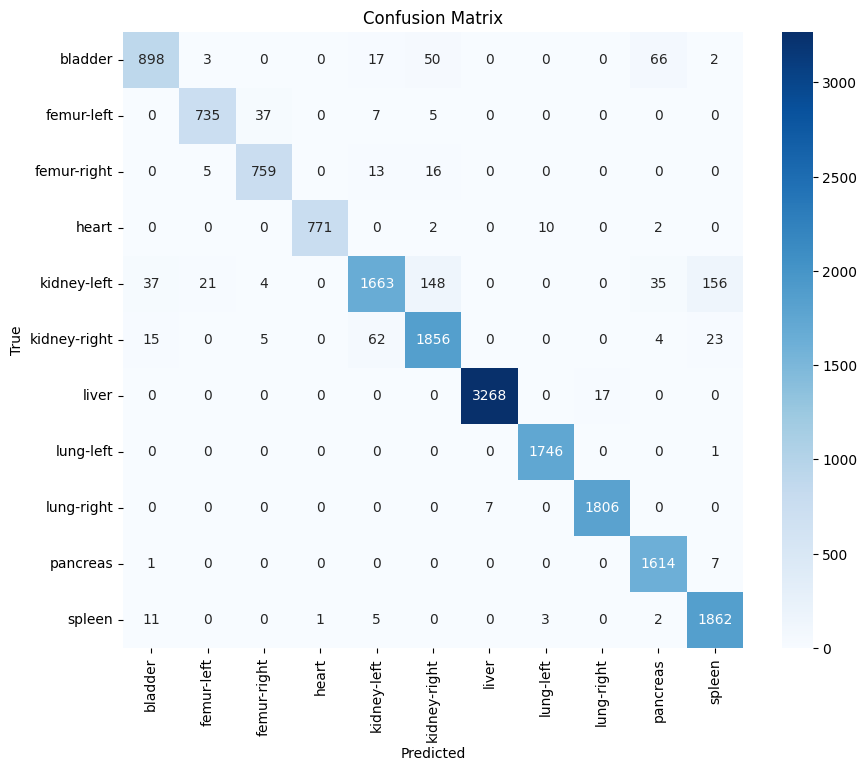

MODEL 2
Training dataset size: 32841
Calibration dataset size: 8211
Train Epoch: 0 [0/26273 (0%)]	Loss: 2.641996
Train Epoch: 0 [1280/26273 (5%)]	Loss: 0.812199
Train Epoch: 0 [2560/26273 (10%)]	Loss: 0.483940
Train Epoch: 0 [3840/26273 (15%)]	Loss: 0.346349
Train Epoch: 0 [5120/26273 (20%)]	Loss: 0.318348
Train Epoch: 0 [6400/26273 (24%)]	Loss: 0.294388
Train Epoch: 0 [7680/26273 (29%)]	Loss: 0.206731
Train Epoch: 0 [8960/26273 (34%)]	Loss: 0.169968
Train Epoch: 0 [10240/26273 (39%)]	Loss: 0.222725
Train Epoch: 0 [11520/26273 (44%)]	Loss: 0.121331
Train Epoch: 0 [12800/26273 (49%)]	Loss: 0.115407
Train Epoch: 0 [14080/26273 (54%)]	Loss: 0.198719
Train Epoch: 0 [15360/26273 (59%)]	Loss: 0.125734
Train Epoch: 0 [16640/26273 (63%)]	Loss: 0.079478
Train Epoch: 0 [17920/26273 (68%)]	Loss: 0.134217
Train Epoch: 0 [19200/26273 (73%)]	Loss: 0.128036
Train Epoch: 0 [20480/26273 (78%)]	Loss: 0.100948
Train Epoch: 0 [21760/26273 (83%)]	Loss: 0.078001
Train Epoch: 0 [23040/26273 (88%)]	Loss: 0.08

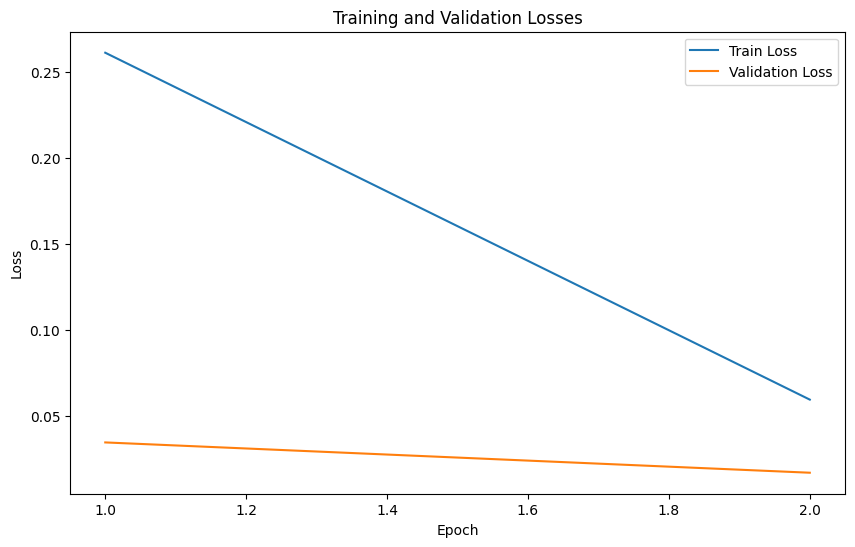

Accuracy: 0.963
Balanced Accuracy: 0.957
AUC: 0.998


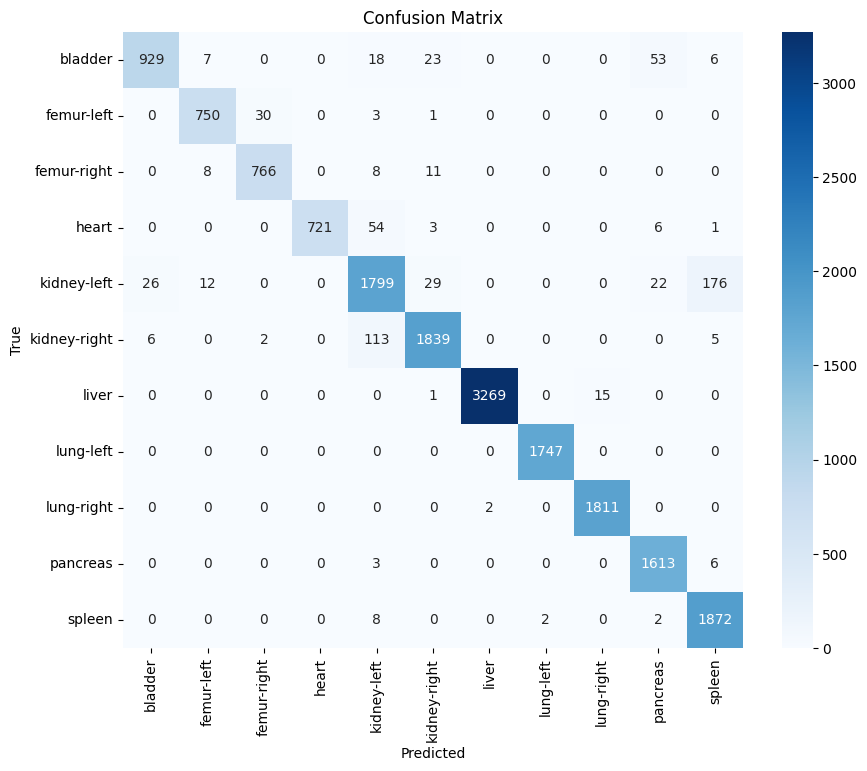

MODEL 3
Training dataset size: 32841
Calibration dataset size: 8211
Train Epoch: 0 [0/26273 (0%)]	Loss: 2.592809
Train Epoch: 0 [1280/26273 (5%)]	Loss: 0.778609
Train Epoch: 0 [2560/26273 (10%)]	Loss: 0.536708
Train Epoch: 0 [3840/26273 (15%)]	Loss: 0.361003
Train Epoch: 0 [5120/26273 (20%)]	Loss: 0.250288
Train Epoch: 0 [6400/26273 (24%)]	Loss: 0.199193
Train Epoch: 0 [7680/26273 (29%)]	Loss: 0.209368
Train Epoch: 0 [8960/26273 (34%)]	Loss: 0.199169
Train Epoch: 0 [10240/26273 (39%)]	Loss: 0.156233
Train Epoch: 0 [11520/26273 (44%)]	Loss: 0.118504
Train Epoch: 0 [12800/26273 (49%)]	Loss: 0.129805
Train Epoch: 0 [14080/26273 (54%)]	Loss: 0.151240
Train Epoch: 0 [15360/26273 (59%)]	Loss: 0.142604
Train Epoch: 0 [16640/26273 (63%)]	Loss: 0.230903
Train Epoch: 0 [17920/26273 (68%)]	Loss: 0.113697
Train Epoch: 0 [19200/26273 (73%)]	Loss: 0.062441
Train Epoch: 0 [20480/26273 (78%)]	Loss: 0.122167
Train Epoch: 0 [21760/26273 (83%)]	Loss: 0.057758
Train Epoch: 0 [23040/26273 (88%)]	Loss: 0.13

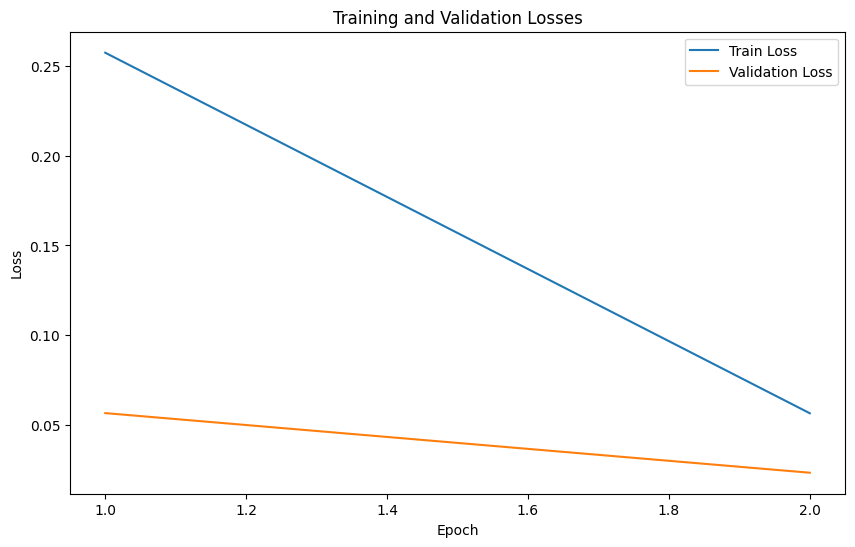

Accuracy: 0.965
Balanced Accuracy: 0.960
AUC: 0.997


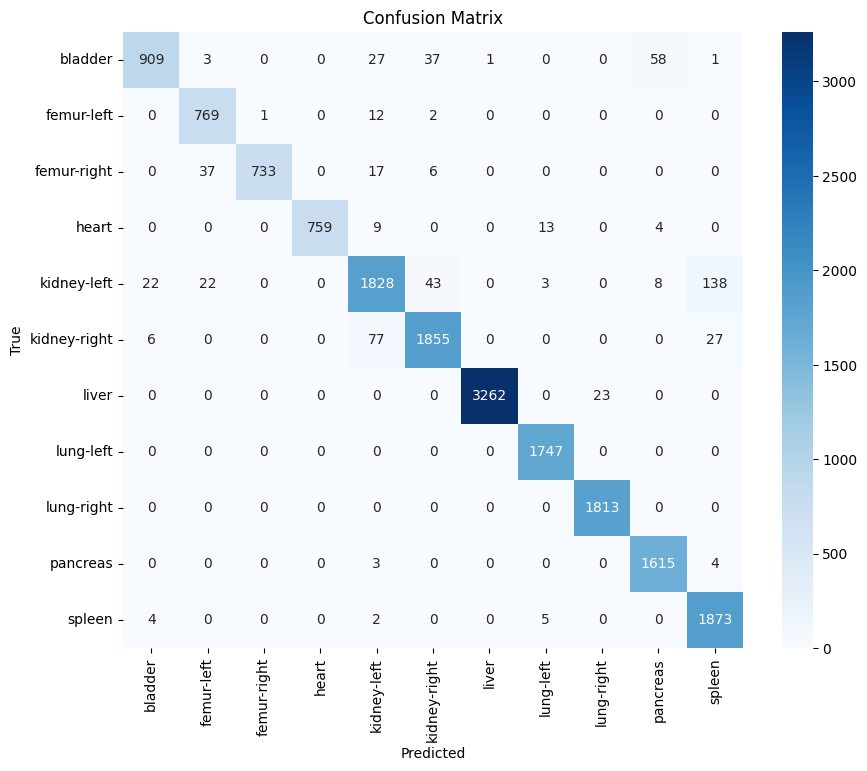

MODEL 4
Training dataset size: 32841
Calibration dataset size: 8211
Train Epoch: 0 [0/26273 (0%)]	Loss: 2.582950
Train Epoch: 0 [1280/26273 (5%)]	Loss: 0.898081
Train Epoch: 0 [2560/26273 (10%)]	Loss: 0.449217
Train Epoch: 0 [3840/26273 (15%)]	Loss: 0.378939
Train Epoch: 0 [5120/26273 (20%)]	Loss: 0.266933
Train Epoch: 0 [6400/26273 (24%)]	Loss: 0.347137
Train Epoch: 0 [7680/26273 (29%)]	Loss: 0.166150
Train Epoch: 0 [8960/26273 (34%)]	Loss: 0.325358
Train Epoch: 0 [10240/26273 (39%)]	Loss: 0.137076
Train Epoch: 0 [11520/26273 (44%)]	Loss: 0.132848
Train Epoch: 0 [12800/26273 (49%)]	Loss: 0.260870
Train Epoch: 0 [14080/26273 (54%)]	Loss: 0.128393
Train Epoch: 0 [15360/26273 (59%)]	Loss: 0.058024
Train Epoch: 0 [16640/26273 (63%)]	Loss: 0.107466
Train Epoch: 0 [17920/26273 (68%)]	Loss: 0.150300
Train Epoch: 0 [19200/26273 (73%)]	Loss: 0.156497
Train Epoch: 0 [20480/26273 (78%)]	Loss: 0.087400
Train Epoch: 0 [21760/26273 (83%)]	Loss: 0.130374
Train Epoch: 0 [23040/26273 (88%)]	Loss: 0.11

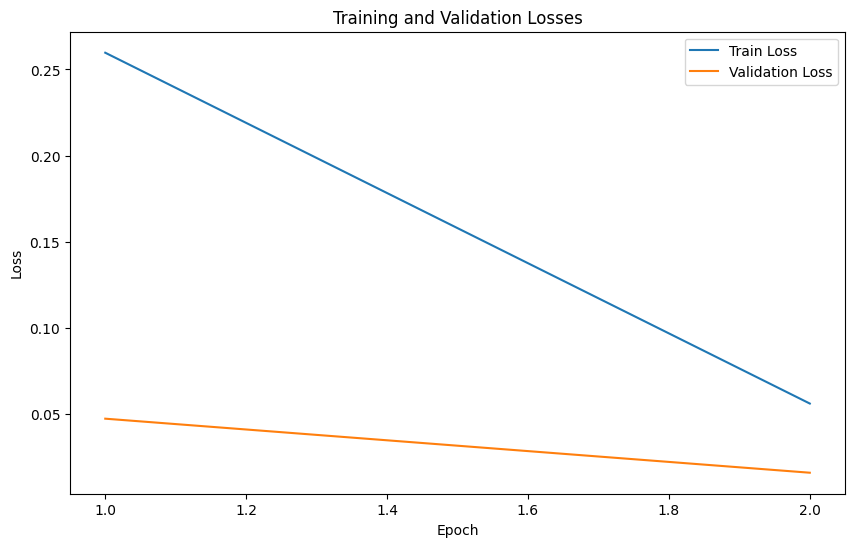

Accuracy: 0.963
Balanced Accuracy: 0.957
AUC: 0.998


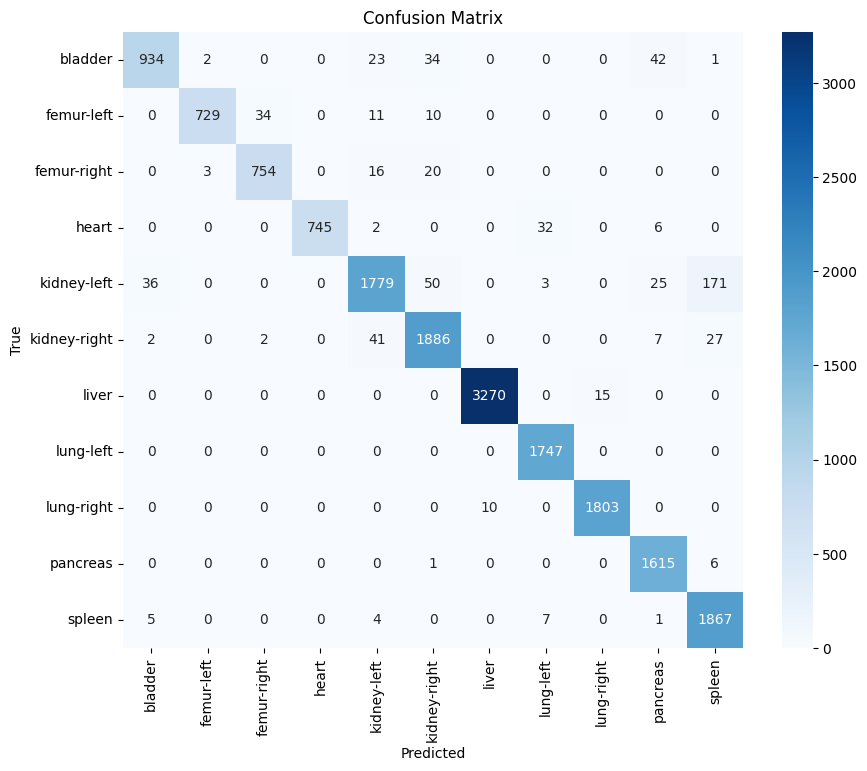

In [4]:
models = []
for i in range(5):
    print('MODEL ' + str(i))
    model = tr.train_resnet18(
        flag,
        train_loader=train_loaders[i],
        val_loader=val_loaders[i],
        test_loader=test_loader,
        num_epochs=2,    
        learning_rate=0.0001,
        device='cuda:0',
        #random_seed=42  # Set a fixed seed for reproducibility
    )
    models.append(model)

Accuracy: 0.970
Balanced Accuracy: 0.965
AUC: 0.998


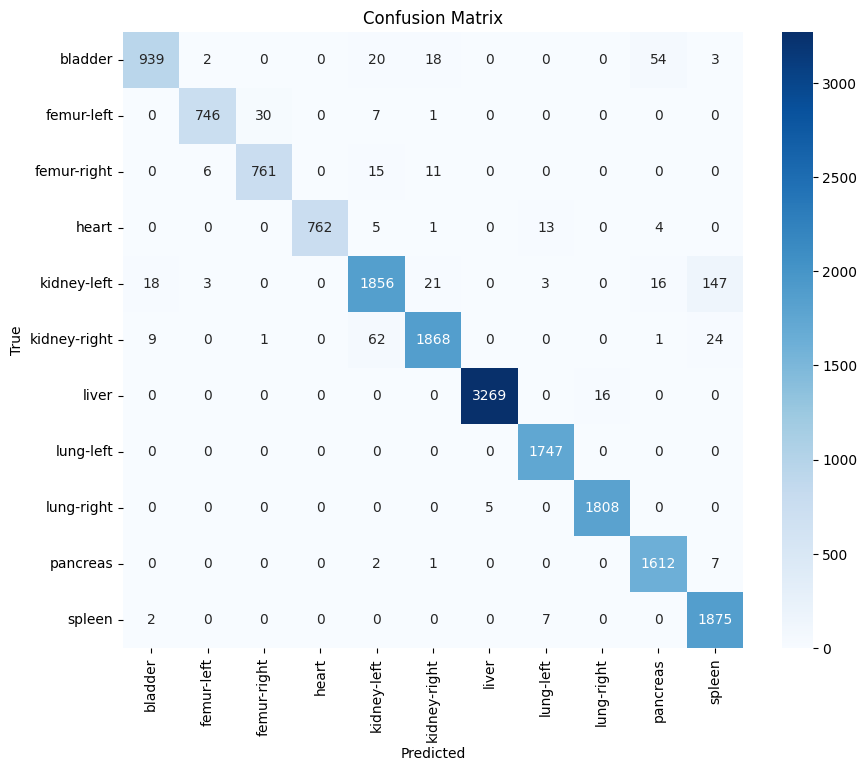

In [5]:
tr.evaluate_model(model=models, test_loader=test_loader, data_flag=flag, device='cuda:0')

In [6]:
for i, model in enumerate(models):
    tr.save_model(model, path=f'models/224x224/resnet18_augmented_{flag}_224_{i}.pt')

Model saved to models/224x224/resnet18_augmented_organamnist_224_0.pt
Model saved to models/224x224/resnet18_augmented_organamnist_224_1.pt
Model saved to models/224x224/resnet18_augmented_organamnist_224_2.pt
Model saved to models/224x224/resnet18_augmented_organamnist_224_3.pt
Model saved to models/224x224/resnet18_augmented_organamnist_224_4.pt
